# Q1: Optimization Algorithms

Optimization algorithms in deep learning are used to minimize a Loss function L(x) parameterized by a model’s parameters. In essence, these algorithms are used to train a model to perform better by iteratively adjusting the parameters.


**What is a Gradient?**

In the context of machine learning and neural networks, a gradient is a vector that represents the direction and rate of fastest increase of a function. It’s calculated by the derivative of the function at a certain point.


In the context of neural networks, the function we’re trying to optimize is often a loss function that measures the difference between the network’s prediction and the actual outcome. We adjust the parameters (weights) of our network in the opposite direction of the gradient to minimize this loss function.


Imagine you’re rolling a ball down a hill. The ball is your model’s parameters, and the hill is your loss function. Your goal is to get the ball to the bottom of the hill as quickly as possible.
The gradient would be the direction that gets it down the fastest.







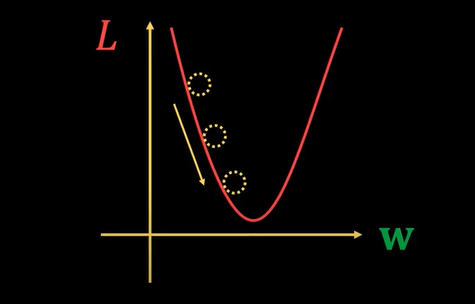

In [ ]:
from IPython.display import Image
Image(filename='/content/gradient descent.png')



**Stochastic Gradient Descent (SGD):**
SGD is an optimization method used to minimize the loss function in machine learning models. The update rule for SGD is represented by the equation:

$$θ=θ−α∇J(θ)$$


Here:

$θ$ represents the parameters (or weights) of the model.

$α$ is the learning rate, which determines the step size during the update.

$∇J(θ)$ is the gradient of the loss function J with respect to the parameters θ. The gradient points in the direction of the steepest ascent, and subtracting it from the current parameters helps us move towards the minimum of the function.


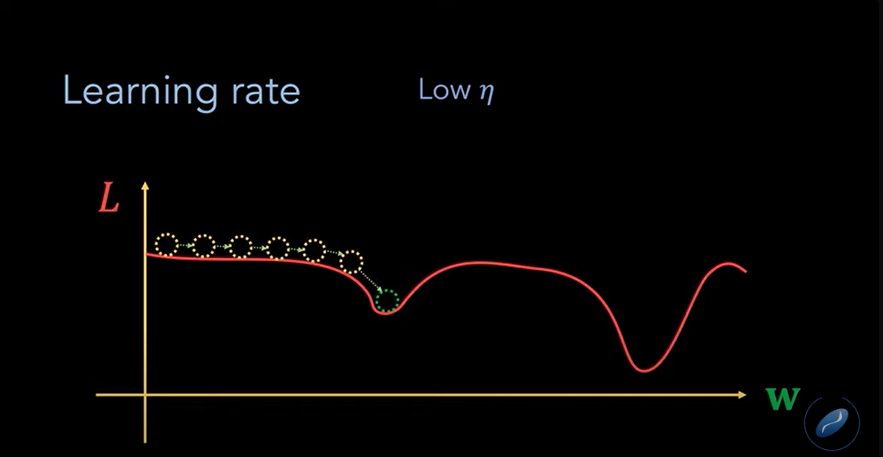

In [ ]:
Image(filename='/content/lowlr.png')

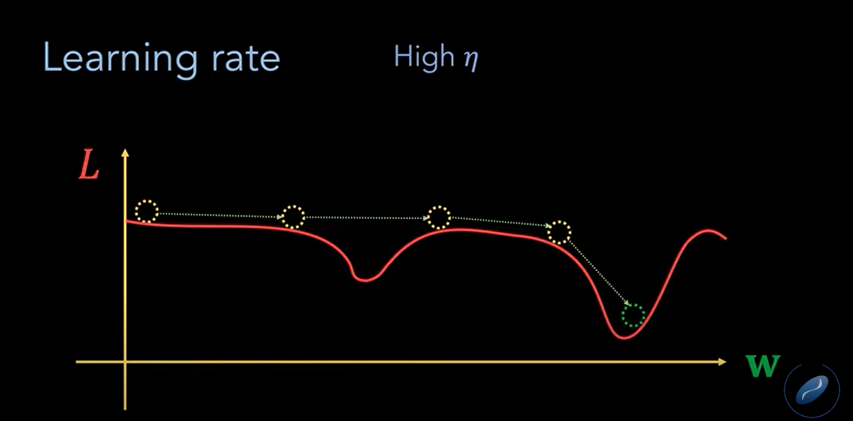

In [ ]:
Image(filename='/content/highlr1.png')

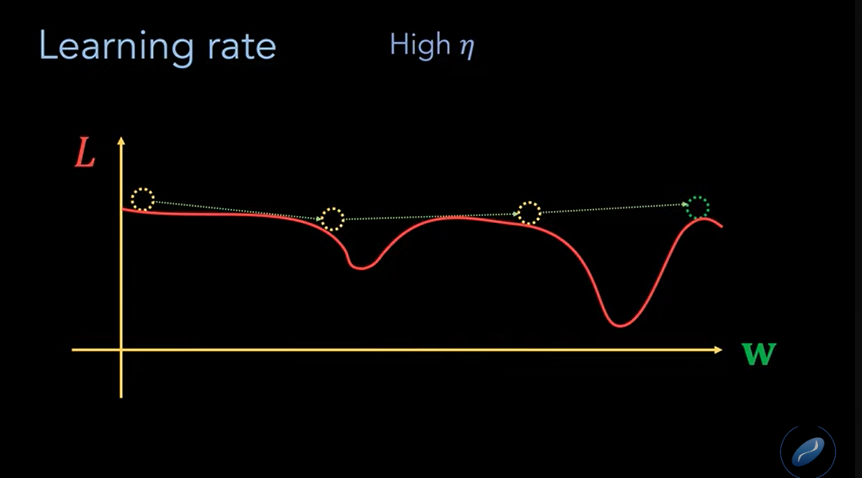

In [ ]:
Image(filename='/content/highlr2.png')


**SGD + Momentum**

The equations for SGD with momentum are:

$$v_t = γv_{t-1} + α ∇J(θ)$$ $$θ = θ - v_t$$

Here:

$v_t$ is the velocity at time t, which is a weighted average of the current gradient and the previous velocity.

$γ$ is the momentum term, which is typically set to 0.9 or a similar value. It determines how much of the previous velocity is retained.


$α$ is the learning rate, and $∇J(θ)$ is the gradient of the loss function.


The updated parameters $θ$ are obtained by subtracting the velocity from the current parameters.

if you’re rolling a ball down a bumpy hill, the ball might get stuck in a small hole (a local minimum) if it’s only considering the immediate slope (gradient). But if the ball has enough momentum (previous velocity), it can roll out of the small hole and continue down towards the bottom of the hill (global minimum).

In the context of optimizing a neural network, the “bumpy hill” is the **loss landscape**, and the “ball” is the **set of parameters** we’re trying to optimize. The “holes” in the hill are **local minima** in the loss landscape, and the “bottom of the hill” is the **global minimum**. By considering the  velocity, we give our optimization process some “momentum” to avoid getting stuck in suboptimal solutions (local minima) and to converge faster to the best solution (global minimum).

**Adagrad**


Adagrad is an optimization algorithm that adapts the learning rate to the parameters, performing smaller updates for parameters associated with frequently occurring features, and larger updates for parameters associated with infrequent features. It’s well-suited for dealing with sparse data.


$$ \theta_{t+1,i}=\theta_{t,i}- \frac{ \eta }{ \sqrt[]{G_{t,ii}+ \epsilon}}.g_{t,i}$$​

$θ_t$​: This represents the parameter at time step t.


$η$: This is the global learning rate.


$G_{t,ii}$​: This is the sum of the squares of the past gradients w.r.t to the parameter $θ_i$​ up to time step t. It’s essentially a diagonal matrix where each diagonal element $i,i$ is the sum of the squares of the gradients w.r.t $θ_i$​ up to time step t.


$ϵ$: This is a smoothing term that avoids division by zero (usually on the order of $1e−8$).


$gt_i$​: This is the gradient at time step t w.r.t. to the parameter θi​.


The update rule thus performs an update of the parameter $θ_i$​ by subtracting a fraction of the gradient. The fraction is determined by the global learning rate divided by the square root of $G_{t,ii​}+ϵ$. This has the effect of normalizing the update step, effectively decaying the learning rate for each parameter based on the historical sum of its gradients.

This makes the algorithm perform larger updates for infrequent and smaller updates for frequent parameters, which is particularly useful for sparse data.


In Adagrad, the size of the steps you take while rolling down the hill isn’t constant. Instead, it depends on the steepness of the hill at each point. If the hill is very steep (more difficult to roll down, a large gradient), you take smaller steps. If the hill is less steep (easier to roll down, a small gradient), you take larger steps.

This is like saying: “If I’ve been going down very steep slopes in the past, I’ll be more cautious and take smaller steps. But if the slopes have been gentle, I can afford to take larger steps.”


Here, the term $\sqrt[]{G_{t,ii+ \epsilon }}$ acts like a brake that adjusts the step size. If the past gradients (slopes) have been large, this term is large, and so the overall step size is smaller. If the past gradients have been small, this term is small, and the step size is larger.


So, Adagrad is like rolling a ball down an uneven hill with an adaptive step size, making it more cautious on steep slopes and more daring on gentle ones.


It’s important to note that Adagrad’s main weakness is its accumulation of the squared gradients in the denominator: Since every added term is positive, the accumulated sum keeps growing during training. This in turn causes the learning rate to shrink and eventually become infinitesimally small, at which point the algorithm is no longer able to acquire additional knowledge. This issue is addressed in later algorithms like Adadelta and Adam.

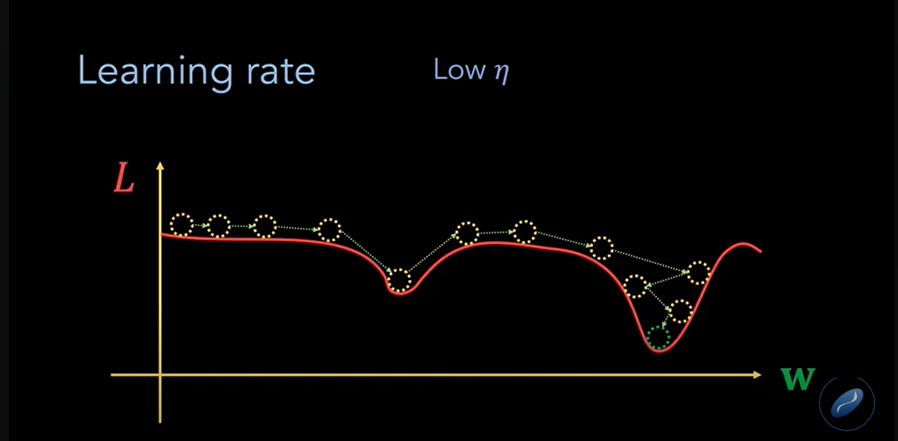

In [ ]:
Image(filename='/content/momentum1.png')

**RMSProp**

 Root Mean Square Propagation is an extension of gradient descent and the AdaGrad version of gradient descent.

 It uses a decaying average of partial gradients in the adaptation of the step size for each parameter.

The use of a decaying moving average allows the algorithm to forget early gradients and focus on the most recently observed partial gradients seen during the progress of the search.

$$ \theta_{t+1}=\theta_{t}- \frac{ \eta }{ \sqrt[]{E[g^2]+\epsilon }}.g_{t}$$​

Here:

$θ_t$​ is the parameter vector at time step t.

$g_t$​ is the gradient at time step t.

$η$ is the learning rate.

$E[g2]_t$​ is the running average of the squared gradient at time step t.

$ϵ$ is a small smoothing term to avoid division by zero.

The key difference between RMSProp and AdaGrad is that while AdaGrad accumulates the squared gradients of all time steps, leading to a decreasing learning rate, RMSProp solves this issue by introducing an exponentially decaying average of squared gradients. This allows the optimizer to adapt more effectively to recent gradients.





# 2- Advantages and Disadvantaged of Optimizers

***SGD with Momentum:***

**Real-world Applications:** SGD with Momentum is widely used in training deep neural networks and machine learning models. For instance, it has been applied in various domains such as ridge and logistic regression, and support vector machines. It’s also used in training models for image determination.

**Preferred Situations**: It is particularly useful in complex and non-convex optimization landscapes where local minima are abundant. It also performs well when the learning rates are low.

***Adagrad:***

**Real-world Applications:** Adagrad is typically used in machine learning applications, especially for training deep learning models with sparse gradients, like recurrent neural networks and transformer models for natural language processing. It’s also used in training language models where the data is often sparse and high-dimensional.

**Preferred Situations:** It is a good choice for problems with sparse data and it is well-suited for dealing with high-dimensional data.


***RMSprop:***

**Real-world Applications:** RMSprop has been successfully applied in various machine learning domains, such as computer vision, natural language processing, and reinforcement learning. For example, RMSprop has been used to train deep neural networks for image classification, sentiment analysis, and game playing.

**Preferred Situations:** It is effective for non-convex optimization problems and is widely used in the stochastic problem.

$$
\begin{array}{|c|c|}
\hline
\text{} & \text{Advantages} & \text{Disadvantages} \\
\hline
\text{SGD+ Momentum} & \text{Typically converges faster} & \text{} \\
\text{} & \text{Less risk in using larger learning rates} & \text{ Performance sensitive to learning rate and momentum} \\
\hline
\text{Adagrad} & \text{Adapts learning rate per parameter using past gradients, ideal for sparse datasets} & \text{The learning rate can become too small over time, hindering convergence} \\
\text{} & \text{Performs well for problems with low learning rates} & \text{Requires more memory than SGD due to the need to store past gradients’ sums} \\
\hline
\text{RMSprop} & \text{suitable for deep neural networks with many layers} & \text{May converge slowly compared to other optimizers like Adam} \\
\text{} & \text{Performs well in various domains} & \text{Not suitable for problems with very sparse data} \\
\hline
\hline
\end{array}
$$


# Q3: SMOTE

**Imbalanced datasets** are those where one class is significantly more represented than the other(s). In other words, they have disproportionate numbers of observations in each category of the target variable, with one or more classes being extremely under-represented.

This could make it difficult for machine-learning algorithms to learn how to discriminate between them.

Imbalanced datasets are common in the real world and often lead to biased predictions and poor overall performance of the machine learning model.

**Handling Imbalanced Datasets**: There are various techniques to handle imbalanced datasets, including undersampling, oversampling, cost-sensitive learning, and ensemble methods.

In the real world, we often end up trying to train a model on a dataset with very few examples of a given class (e.g., rare disease diagnosis, manufacturing defects, fraudulent transactions), which results in poor performance. Due to the nature of the data (occurrences are so rare), it’s not always realistic to go out and acquire more.

One way of solving this issue is to **under-sample** the majority class. That is to say, we would exclude rows corresponding to the majority class such that there are roughly the same number of rows for both the majority and minority classes. However, in doing so, we lose out on a lot of data that could be used to train our model, thus increasing the risk of bias."

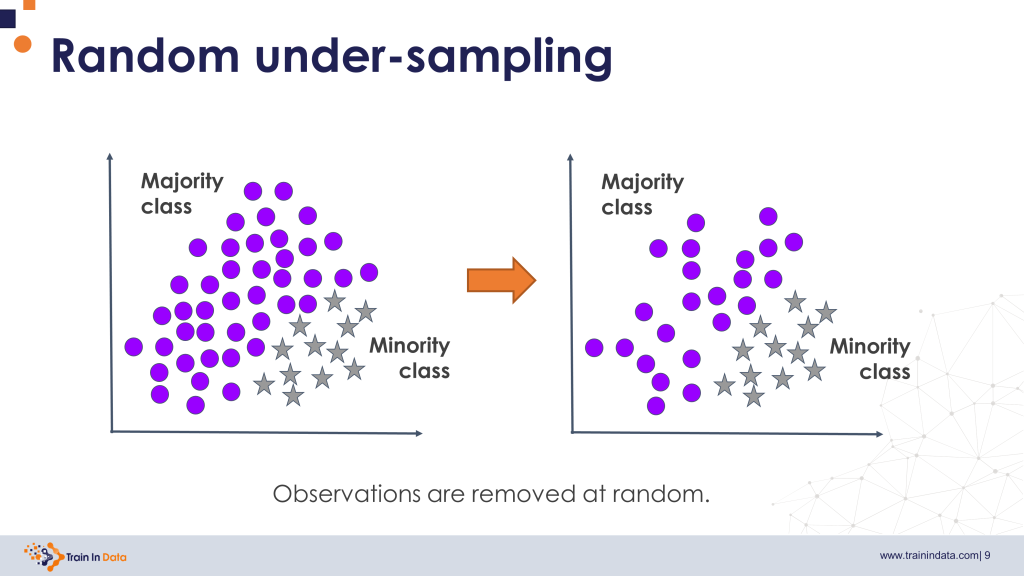

Another option is to **over-sample** the minority class. In other words, we randomly duplicate observations of the minority class. The problem with this approach is that it leads to overfitting because the model learns from the same examples.

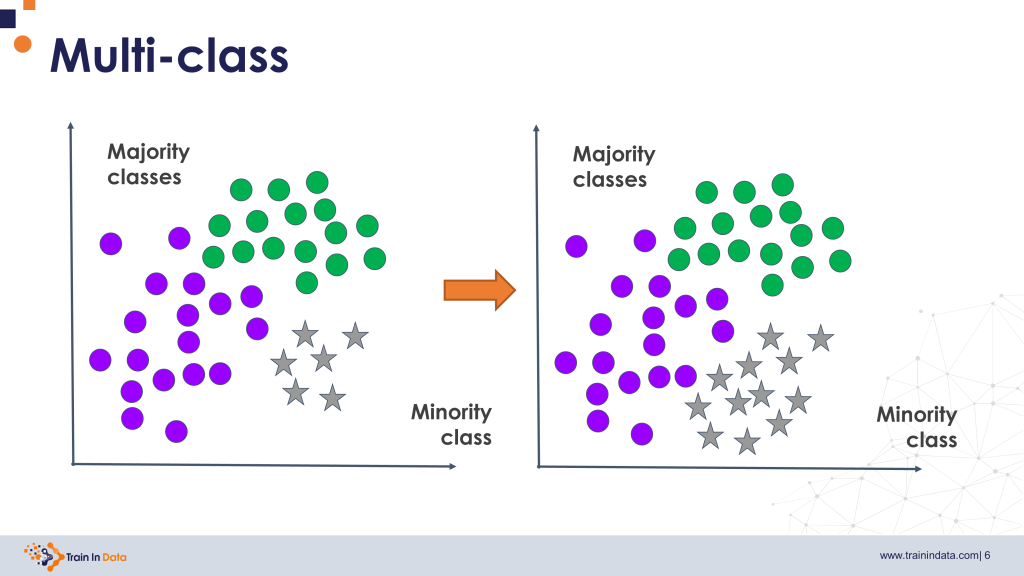




This is where SMOTE comes in.

Synthetic Minority Over-sampling Technique (SMOTE) is a preprocessing technique used to address class imbalance in a dataset.

SMOTE works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.

At a high level, the SMOTE algorithm can be described as follows:

1-Take the difference between a sample and its nearest neighbor.

2-Multiply the difference by a random number between 0 and 1.

3-Add this difference to the sample to generate a new synthetic example in feature space.

4-Continue on with the next nearest neighbor up to a user-defined number.

The synthetic instance is created as follows:

Let’s say we have two instances $x_i$​
 and $x_j$
, where $x_i$​  is the instance under consideration and $x_j$
 is one of its k nearest neighbors. A synthetic instance $x_{new}$ ​
 is created as:
$$x_{new​}=x_i​+λ×(x_j​−x_i​)$$
where λ
 is a random number between 0 and 1. This formula essentially creates a new instance that lies along the line segment joining  $x_i$​​  
 and  $x_j$​
.


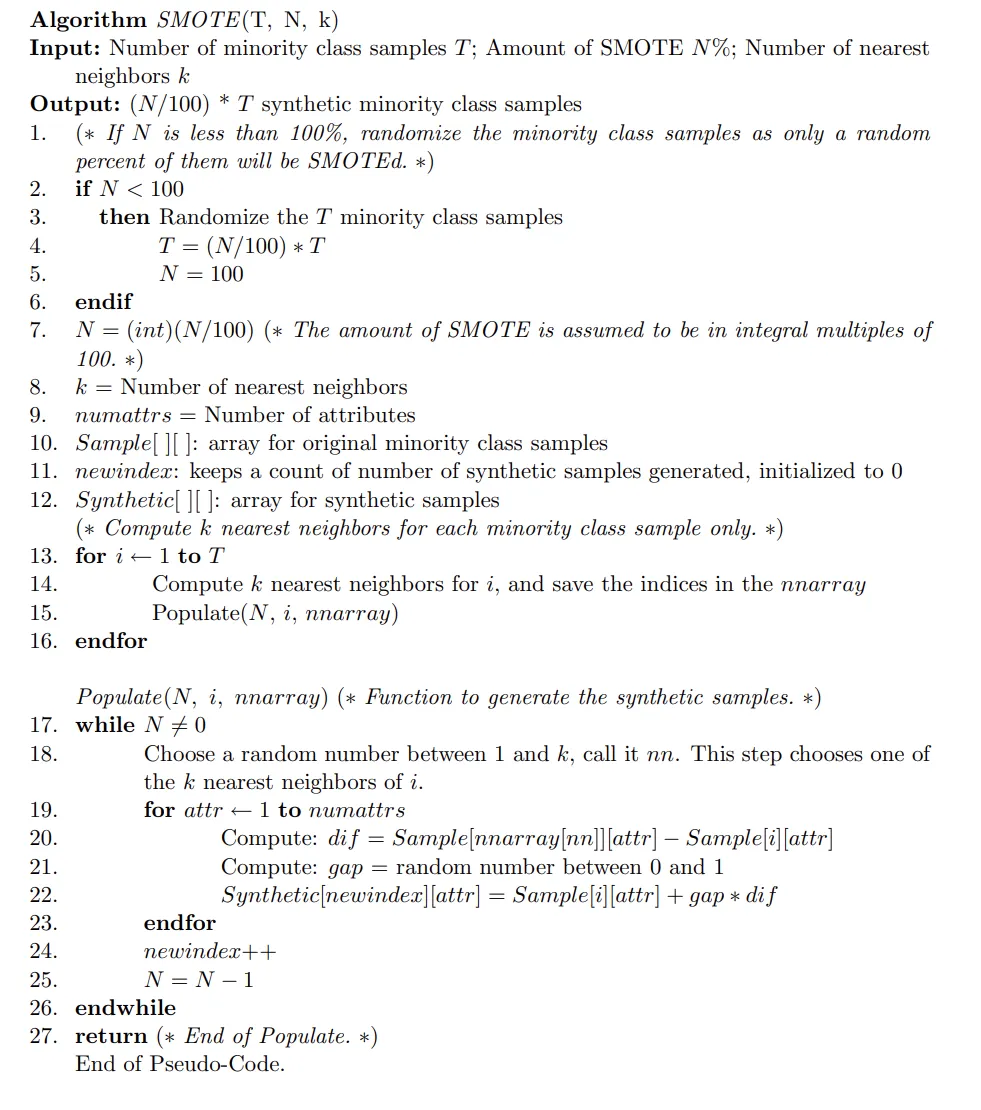




Example of SMOTE using python and tensorflow:
This is a simple example of imbalanced data set of bank fraudments.
in this part we fit the model to two data sets, than one is resampled with SMOTE and compare the metrics.


Import necessary libraries

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

Read the creditcard.csv into a pandas DataFrame

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

Print the shape of the data, columns and number of each class's samples

In [ ]:
print('Data shape:', df.shape)
print('All feautures:', df.columns.tolist())
print('Class counts:', df['Class'].value_counts())

Data shape: (284807, 31)
All feautures: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Class counts: Class
0    284315
1       492
Name: count, dtype: int64


Drop the 'Time' column from the DataFrame

In [ ]:
df = df.drop(['Time'], axis=1)

Create a new DataFrame x which contains all columns of df except 'Class'.

This will be used as the feature matrix for the model.

In [ ]:
x = df.drop(['Class'], axis=1)

Create a Series y which contains the 'Class' column of df.

This will be used as the target variable for the model.

In [ ]:
y = df['Class']

Split the data into training and testing sets.

The test_size parameter is set to 0.2, meaning that 20% of the data will be used for testing.

The random_state parameter ensures reproducibility of results

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Create a simple neural network for binary classification with one hidden layer that has 10 neurons, and an output layer with 1 neuron.

The hidden layer uses ReLU as the activation function, and the output layer uses the sigmoid function.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

Compile and train the model.

The model is trained on the training data for 5 epochs.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
7121/7121 [==============================] - 13s 2ms/step - loss: 0.0246
Epoch 2/5
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0056
Epoch 3/5
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0068
Epoch 4/5
7121/7121 [==============================] - 13s 2ms/step - loss: 0.0045
Epoch 5/5
7121/7121 [==============================] - 13s 2ms/step - loss: 0.0044


Make predictions.

The model's predict function returns probabilities, so this code is converting those probabilities to class labels by thresholding at 0.5. If the predicted probability is greater than 0.5, it predicts class 1, otherwise it predicts class 0.

In [ ]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

1781/1781 [==============================] - 3s 1ms/step


Print the metrics.


When dealing with imbalanced datasets, accuracy is not a good metric to rely on because it can be misleading. A model that always predicts the majority class will have high accuracy, but it’s not actually a useful model.

We explain some other metrics of the models here:

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question of what proportion of positive identifications was actually correct.


Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all observations in actual class. It answers the question of what proportion of actual positives was identified correctly.


F1-Score: The F1 score is the harmonic mean of precision and recall. It tries to find the balance between precision and recall. It is most useful when the cost of false positives and false negatives are very different.


Area Under the Receiver Operating Characteristic Curve (AUC-ROC): ROC curve is a plot of the true positive rate against the false positive rate. The AUC-ROC gives the rate of successful classification by the logistic model.

Confusion Matrix: A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It gives a more holistic view of what the model is getting right and what types of errors it is making.

The choice of metric depends on the specific problem and the business context.

In the context of fraud detection, we might care more about recall (because it’s important to catch as many fraud cases as possible) than precision (because it’s okay if some non-fraud cases are flagged for review).

 On the other hand, precision would be important if false positives (flagging non-fraud cases as fraud) would result in significant costs (like legal issues).


The F1 score can be a good metric to consider if we want a balance between precision and recall.


 Also, AUC-ROC is always a good general measure for binary classification problems.

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.9993153330290369
Precision: 0.8831168831168831
Recall: 0.6938775510204082
F1 Score: 0.7771428571428571
AUC-ROC: 0.8468596393256232


Now, first we use SMOTE to resample the data and repeat the process to compare the results.

In [ ]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)
print(y_res.value_counts())

x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x_train_res, y_train_res, epochs=5)
y_pred_res = (model.predict(x_test_res) > 0.5).astype("int32")

print('Accuracy:', accuracy_score(y_test_res, y_pred_res))
print('Precision:', precision_score(y_test_res, y_pred_res))
print('Recall:', recall_score(y_test_res, y_pred_res))
print('F1 Score:', f1_score(y_test_res, y_pred_res))
print('AUC-ROC:', roc_auc_score(y_test_res, y_pred_res))

Class
0    284315
1    284315
Name: count, dtype: int64
Epoch 1/5
14216/14216 [==============================] - 28s 2ms/step - loss: 0.0773
Epoch 2/5
14216/14216 [==============================] - 24s 2ms/step - loss: 0.0472
Epoch 3/5
14216/14216 [==============================] - 26s 2ms/step - loss: 0.0379
Epoch 4/5
14216/14216 [==============================] - 24s 2ms/step - loss: 0.0339
Epoch 5/5
3554/3554 [==============================] - 5s 1ms/step
Accuracy: 0.9922708967166699
Precision: 0.9894940751470306
Recall: 0.9951383038472339
F1 Score: 0.9923081634974668
AUC-ROC: 0.9922651871659078


# Q4: classification Model

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.metrics import accuracy_score, mean_squared_error
from keras.optimizers import Adagrad, RMSprop, Adam
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Weakly correlated features are often removed to reduce the dimensionality of the data and to improve the performance of machine learning models. Weak correlations imply that the feature doesn’t have a strong relationship with the target variable, and thus, it might not provide useful information for the model’s predictions.

That's why it is a good practice to drop weakly correlated features.

In [ ]:
df = pd.read_csv('Assignment 1-Dataset.csv')

correlations = df.corr()['Target'].sort_values()
corr_threshold = 0.01
weak_corrs = correlations[abs(correlations) < corr_threshold].index

df = df.drop(columns=weak_corrs)


Print some information about the dataset.

In [ ]:
print('Data shape:', df.shape)
print('All feautures:', df.columns.tolist())
print(df.dtypes)
print('Class counts:', df['Target'].value_counts())

Data shape: (111304, 39)
All feautures: ['F2', 'F3', 'F4', 'F6', 'F7', 'F8', 'F10', 'F11', 'F12', 'F13', 'F15', 'F16', 'F17', 'F23', 'F24', 'F46', 'F47', 'F48', 'F49', 'F50', 'F55', 'F56', 'F65', 'F75', 'F76', 'F80', 'F81', 'F82', 'F83', 'F84', 'F86', 'F87', 'F88', 'F89', 'F91', 'F92', 'Target', 'Unnamed: 93', 'Unnamed: 94']
F2               int64
F3               int64
F4               int64
F6               int64
F7               int64
F8               int64
F10              int64
F11              int64
F12              int64
F13              int64
F15              int64
F16              int64
F17              int64
F23              int64
F24              int64
F46              int64
F47              int64
F48              int64
F49              int64
F50              int64
F55              int64
F56              int64
F65              int64
F75              int64
F76              int64
F80            float64
F81              int64
F82              int64
F83              int64
F84   

There are two unrelated columns that need to be dropped.

In [ ]:
df = df.drop(['Unnamed: 93'], axis=1)
df = df.drop(['Unnamed: 94'], axis=1)
print('Data shape:', df.shape)

Data shape: (111304, 37)


Initialize feature matrix and target variable.

In [ ]:
x = df.drop(['Target'], axis=1)
y = df['Target']

Compare the dataset's balance before and after applying smote.

In [ ]:
sm = SMOTE(random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

x_res, y_res = sm.fit_resample(x, y)
print(y_res.value_counts())

Target
0    57213
2    36250
1    17841
Name: count, dtype: int64
Target
0    45770
2    29000
1    14273
Name: count, dtype: int64
Target
0    11443
2     7250
1     3568
Name: count, dtype: int64
Target
2    57213
1    57213
0    57213
Name: count, dtype: int64


Features with a low variance will not affect the target variable much and hence can be removed as they contain less informative data. Because our dataset consists of a lot of columns that are nearly 0 for every sample, by removing the features that don't meet the VarianceTreshold we can improve our model's performance

In [ ]:
selector = VarianceThreshold(threshold=0.5)
x_res = selector.fit_transform(x_res)

The performance of many machine learning algorithms can be affected if the features are not on the same scale. For example, features with a high variance that are orders of magnitude larger than others can dominate the algorithm and make the estimator unable to learn from other features correctly as expected.

So, by standardizing the features, we’re making sure that all features have the same scale, preventing any single feature from dominating others when we run our machine learning algorithms.

In [ ]:
scaler = StandardScaler()
x_res = scaler.fit_transform(x_res)

Split the data into test and train.

In [ ]:
x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

Set up a neural network model with two hidden layers and one output layer, using batch normalization and dropout for regularization, and compiling it with the Adagrad optimizer and the sparse categorical crossentropy loss function.

In [ ]:
input_dim = x_res.shape[1]
num_labels = 3

model = Sequential()
model.add(Dense(256, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adagrad(), metrics=['accuracy', 'mse'])

Make predictions.

In [ ]:
print('Training with AdaGrad optimizer ...')
history = model.fit(x_train_res, y_train_res, batch_size=128, epochs=300, verbose=2, validation_split=0.2)

y_pred_res = model.predict(x_test_res)
y_pred_res = np.argmax(y_pred_res, axis=1)

acc_adam = accuracy_score(y_test_res, y_pred_res)
mse_adam = mean_squared_error(y_test_res, y_pred_res)

Training with AdaGrad optimizer ...
Epoch 1/300
859/859 - 5s - loss: 0.9284 - accuracy: 0.5895 - mse: 1.1930 - val_loss: 0.7682 - val_accuracy: 0.6583 - val_mse: 1.1792 - 5s/epoch - 6ms/step
Epoch 2/300
859/859 - 4s - loss: 0.8528 - accuracy: 0.6213 - mse: 1.1949 - val_loss: 0.7452 - val_accuracy: 0.6665 - val_mse: 1.1796 - 4s/epoch - 5ms/step
Epoch 3/300
859/859 - 4s - loss: 0.8358 - accuracy: 0.6242 - mse: 1.1952 - val_loss: 0.7381 - val_accuracy: 0.6683 - val_mse: 1.1783 - 4s/epoch - 5ms/step
Epoch 4/300
859/859 - 4s - loss: 0.8204 - accuracy: 0.6312 - mse: 1.1955 - val_loss: 0.7280 - val_accuracy: 0.6729 - val_mse: 1.1845 - 4s/epoch - 4ms/step
Epoch 5/300
859/859 - 4s - loss: 0.8126 - accuracy: 0.6349 - mse: 1.1958 - val_loss: 0.7243 - val_accuracy: 0.6747 - val_mse: 1.1820 - 4s/epoch - 4ms/step
Epoch 6/300
859/859 - 4s - loss: 0.8009 - accuracy: 0.6396 - mse: 1.1954 - val_loss: 0.7196 - val_accuracy: 0.6772 - val_mse: 1.1849 - 4s/epoch - 5ms/step
Epoch 7/300
859/859 - 3s - loss: 0

In [ ]:
print('Test accuracy with AdaGrad:', acc_adam)
print('Test MSE with AdaGrad:', mse_adam)

Test accuracy with AdaGrad: 0.7375611745513866
Test MSE with AdaGrad: 0.6952924726171056


Plot the accuracy and loss.

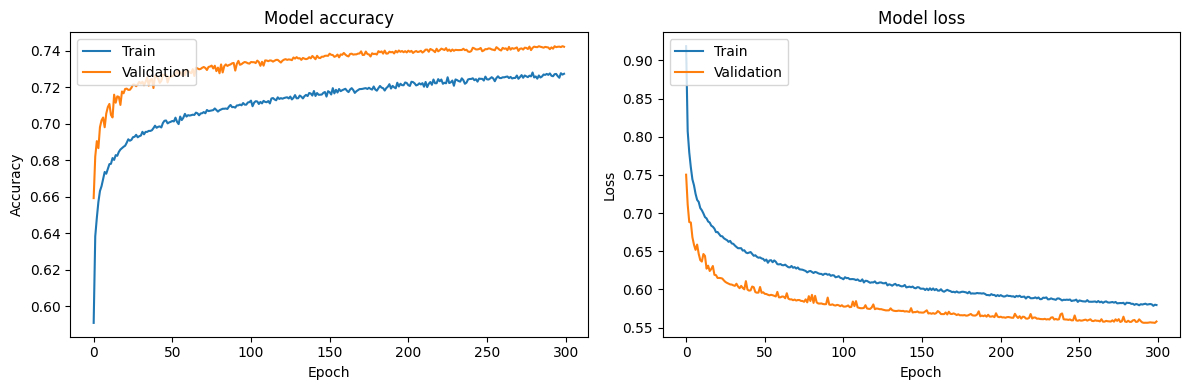

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Now we use RMSprop for optimization and compare the results.

In [ ]:
x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy', 'mse'])
print('Training with RMSprop optimizer ...')

history2 = model.fit(x_train_res, y_train_res, batch_size=128, epochs=300, verbose=2, validation_split=0.2)

y_pred_res = model.predict(x_test_res)
y_pred_res = np.argmax(y_pred_res, axis=1)

acc_adam = accuracy_score(y_test_res, y_pred_res)
mse_adam = mean_squared_error(y_test_res, y_pred_res)

print('Test accuracy with RMSprop:', acc_adam)
print('Test MSE with RMSprop:', mse_adam)

Training with RMSprop optimizer ...
Epoch 1/300
859/859 - 6s - loss: 0.6193 - accuracy: 0.7082 - mse: 1.2120 - val_loss: 0.5847 - val_accuracy: 0.7238 - val_mse: 1.2108 - 6s/epoch - 7ms/step
Epoch 2/300
859/859 - 6s - loss: 0.5865 - accuracy: 0.7204 - mse: 1.2154 - val_loss: 0.5741 - val_accuracy: 0.7292 - val_mse: 1.2225 - 6s/epoch - 7ms/step
Epoch 3/300
859/859 - 7s - loss: 0.5678 - accuracy: 0.7286 - mse: 1.2190 - val_loss: 0.5478 - val_accuracy: 0.7382 - val_mse: 1.2187 - 7s/epoch - 9ms/step
Epoch 4/300
859/859 - 7s - loss: 0.5578 - accuracy: 0.7328 - mse: 1.2209 - val_loss: 0.5602 - val_accuracy: 0.7316 - val_mse: 1.2151 - 7s/epoch - 9ms/step
Epoch 5/300
859/859 - 7s - loss: 0.5490 - accuracy: 0.7384 - mse: 1.2228 - val_loss: 0.5418 - val_accuracy: 0.7390 - val_mse: 1.2219 - 7s/epoch - 8ms/step
Epoch 6/300
859/859 - 6s - loss: 0.5433 - accuracy: 0.7410 - mse: 1.2239 - val_loss: 0.5337 - val_accuracy: 0.7450 - val_mse: 1.2231 - 6s/epoch - 7ms/step
Epoch 7/300
859/859 - 7s - loss: 0

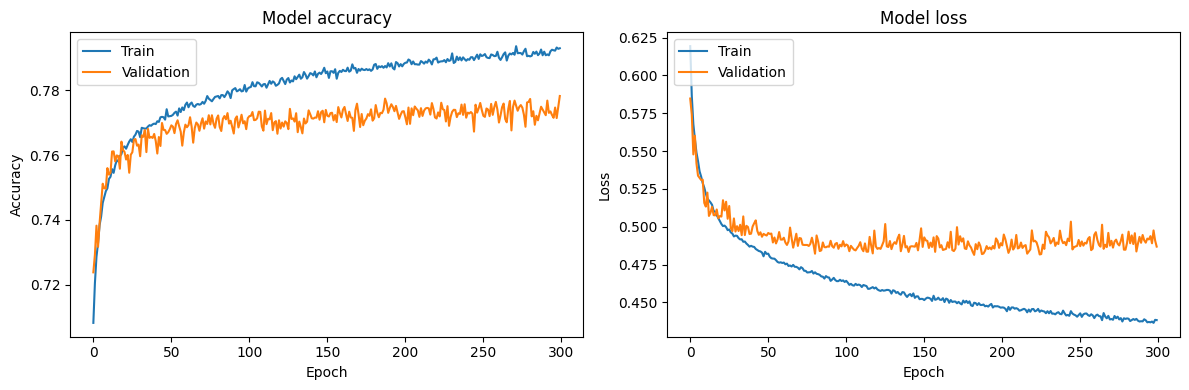

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

As you can see performance of the model improves when we use RMSprop instead of Adagrad.

# References

1. TensorFlow. (n.d.). Classification on imbalanced data. Retrieved from [https://www.tensorflow.org/tutorials/structured_data/imbalanced_data](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data)

2. Maklin, C. (n.d.). Synthetic Minority Over-Sampling Technique (SMOTE). Retrieved from [https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c](https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c)

3. TrainInData. (n.d.). Machine Learning with Imbalanced Data. Retrieved from [https://www.blog.trainindata.com/machine-learning-with-imbalanced-data/](https://www.blog.trainindata.com/machine-learning-with-imbalanced-data/)

4. Built In. (n.d.). Multiclass Classification. Retrieved from [https://builtin.com/machine-learning/multiclass-classification](https://builtin.com/machine-learning/multiclass-classification)

5. Zhang, H., Goodfellow, I., Metaxas, D., & Odena, A. (2019). Self-Attention Generative Adversarial Networks. Retrieved from [https://arxiv.org/pdf/1910.05446.pdf](https://arxiv.org/pdf/1910.05446.pdf)

6. Cornell University. (n.d.). Momentum. Retrieved from [https://optimization.cbe.cornell.edu/index.php?title=Momentum#Applications](https://optimization.cbe.cornell.edu/index.php?title=Momentum#Applications)

7. Cornell University. (n.d.). RMSProp. Retrieved from [https://optimization.cbe.cornell.edu/index.php?title=RMSProp](https://optimization.cbe.cornell.edu/index.php?title=RMSProp)

8. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.

9. Aggarwal, C. C. (2018). Neural Networks and Deep Learning: A Textbook. Springer.
